#  Predicting the survival of Titanic Passengers

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,roc_auc_score,recall_score,confusion_matrix

C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\__init__.py:1004: UserWarning: could not find rc file; returning defaults
  warnings.warn(message)
C:\Users\AKHIL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir(r"F:\BA\x\Project A\Project A-20190925")
df=pd.read_csv("train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df=df.copy()

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Lets check the data type

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Lets check the summary of data

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. EDA

### 2.1 Data cleaning and imputation

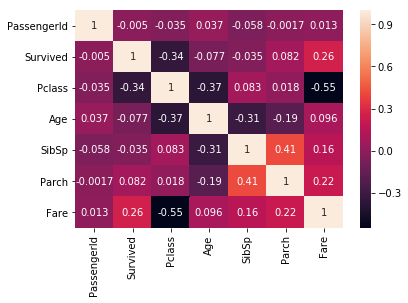

In [7]:
# Correlation of variable with each other'
sns.heatmap(titanic_df.corr(),annot=True)

#### we can see passengerid has no correlation with any variable 

In [8]:
titanic_df.drop(["PassengerId"],axis=1,inplace=True)

#### We can delete columns Name,Ticket beacause its unique totally

In [9]:
titanic_df.drop(["Name","Ticket"],axis=1,inplace=True)

In [10]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### To calculate null value and fill/drop na

In [12]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# to calculate null value percentage
cabin_null=(687/891)*100
print("Cabin_null:",cabin_null)
age_null=(177/891)*100
print("Age_null:",age_null)
embarked_null=(2/891)*100
print("Embarked_null:",embarked_null)

Cabin_null: 77.10437710437711
Age_null: 19.865319865319865
Embarked_null: 0.22446689113355783


#### cabin variable having 77% null values so it is impossible to replace these values with mean, median
#### Then we should be drop the variable

In [14]:
titanic_df.drop(["Cabin"],axis=1,inplace=True)

#### To replace the null value of age variable with mean

In [15]:
mean=titanic_df["Age"].mean()
mode=titanic_df["Embarked"].mode()
titanic_df['Age'].fillna(mean,inplace=True)

#### To delete the null value of Embarked

In [16]:
titanic_df.dropna(axis=0,how="any",inplace=True)

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [18]:
num_list=titanic_df._get_numeric_data().columns
cat_list=list(set(titanic_df.columns)-set(titanic_df._get_numeric_data().columns))
for i in range(0,len(cat_list),1):
    if len(cat_list) > i:
        print(titanic_df[cat_list[i]].value_counts())


S    644
C    168
Q     77
Name: Embarked, dtype: int64
male      577
female    312
Name: Sex, dtype: int64


In [19]:
titanic_df["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [20]:
titanic_df["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [21]:
titanic_df["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
titanic_df["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

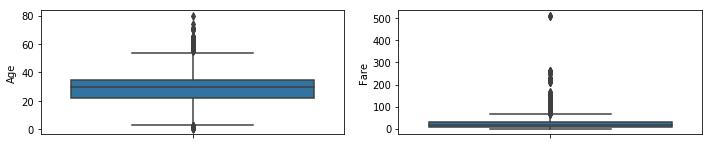

In [23]:
#let check the outlier of Age and fare columns
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.boxplot(y=titanic_df["Age"])
plt.subplot(2,2,2)
sns.boxplot(y=titanic_df["Fare"])
plt.tight_layout()
plt.show()
        

#### Here we can see age variabe having outlier but these outlier practically valid 

In [24]:
# Some people having age till 80 
# Outlier is present in Fare column, let the handle outliers
mean=np.mean(titanic_df["Fare"])
std=np.std(titanic_df["Fare"])
m1=mean+3*std
m1

181.10531617645913

In [25]:
(titanic_df["Fare"]>m1).value_counts()

False    869
True      20
Name: Fare, dtype: int64

In [26]:
Fare_outlier=(20/891)*100
Fare_outlier

2.244668911335578

In [27]:
# Fare having 2 % outlier so we can delete these Outlier
titanic_df[titanic_df["Fare"]>m1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.000000,3,2,263.0000,S
88,1,1,female,23.000000,3,2,263.0000,S
118,0,1,male,24.000000,0,1,247.5208,C
258,1,1,female,35.000000,0,0,512.3292,C
299,1,1,female,50.000000,0,1,247.5208,C
311,1,1,female,18.000000,2,2,262.3750,C
341,1,1,female,24.000000,3,2,263.0000,S
377,0,1,male,27.000000,0,2,211.5000,C
380,1,1,female,42.000000,0,0,227.5250,C
438,0,1,male,64.000000,1,4,263.0000,S


In [28]:
titanic_df.drop([27,88,118,258,299,311,341,377,380,438,527,557,679,689,700,716,730,737,742,779],axis=0,inplace=True)

In [29]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 2.2 Data visualization

C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


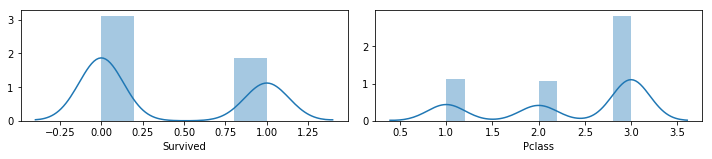

C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


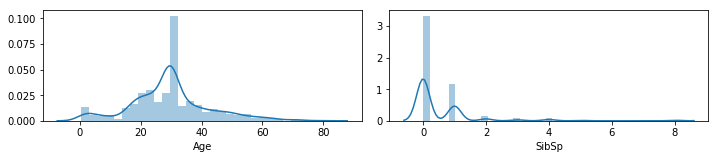

C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


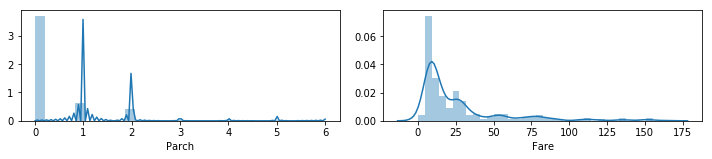

In [69]:
for i in range(0,len(num_list),2):
    if len(num_list) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(2,2,1)
        sns.distplot(titanic_df[num_list[i]],kde=True)
        plt.subplot(2,2,2)
        sns.distplot(titanic_df[num_list[i+1]],kde=True)
        plt.tight_layout()
        plt.show()
    else:

        sns.distplot(titanic_df[num_list[i]],kde=True)

#### here we can see the Age variable is normally distributed 

In [30]:
pd.crosstab([titanic_df.Sex,titanic_df.Survived],titanic_df.Pclass,margins=True).style.background_gradient(cmap='YlGnBu')

In [31]:
titanic_df["Pclass"].value_counts()

3    491
1    194
2    184
Name: Pclass, dtype: int64

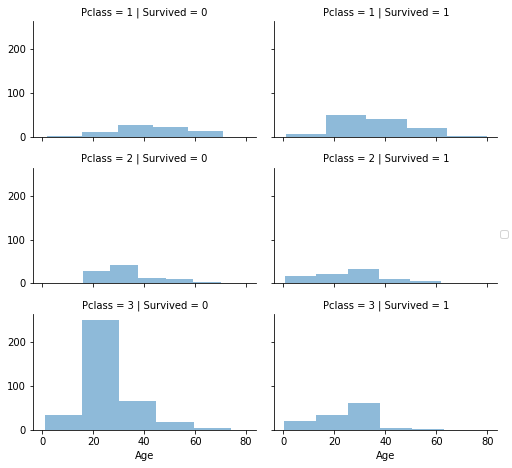

In [32]:
grid1 = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid1.map(plt.hist, 'Age', alpha=.5, bins=5)
grid1.add_legend();

#### Here we can see that Pclass_1 of middle age are more survived and PClass_2 & PClass_3 of middle age less survived

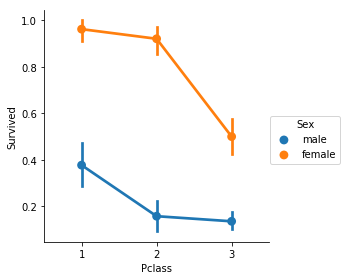

In [33]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df)
plt.show()

#### Here we can see female and Pclass_1 more survived 

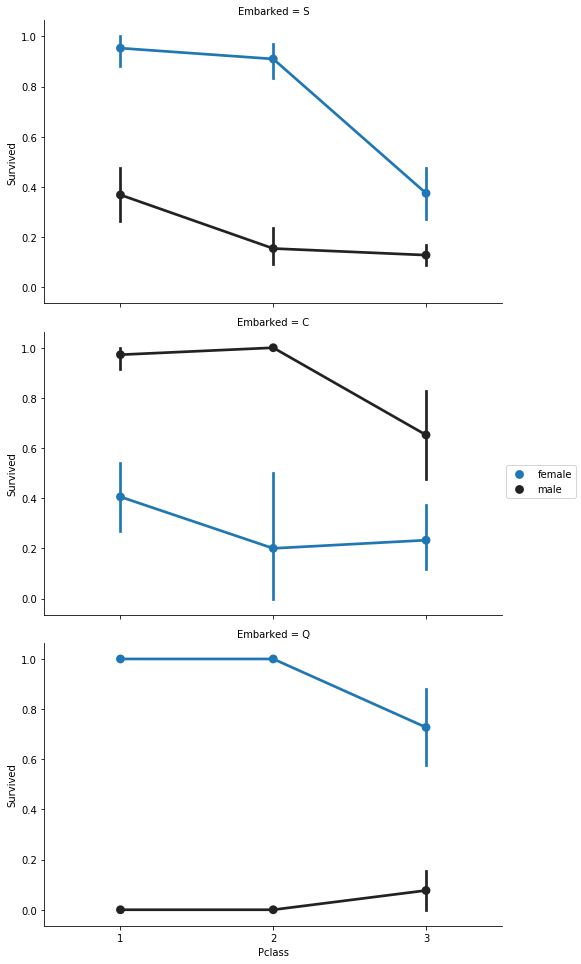

In [34]:
grid2=sns.FacetGrid(titanic_df,row="Embarked",size=4.5,aspect=1.6)
grid2.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
grid2.add_legend()

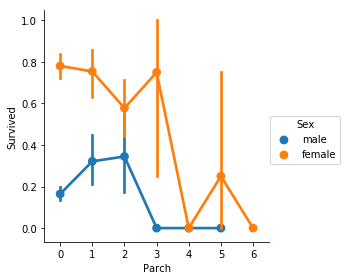

In [35]:
sns.factorplot('Parch','Survived',hue='Sex',data=titanic_df)

#### Here we can see femal on Parch 0,1,2,3 more survived

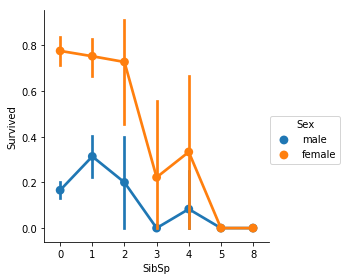

In [36]:
sns.factorplot('SibSp','Survived',hue='Sex',data=titanic_df)

#### Here we can see femal on Parch 0,1,2 more survived

#### Here we can see female on Embarked Q and c have more survived tham Embarked c and men on Embarked c more survived than others

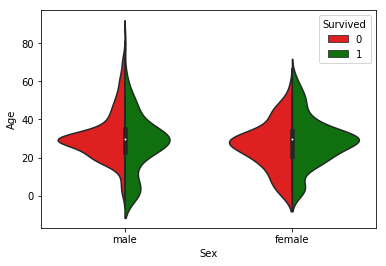

In [77]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_df,split=True,palette={0:"r",1:"g"});

#### To create dummies variable for categorical variable

In [37]:
# To create dummies variable for categorical variable
titanic_cat=pd.get_dummies(titanic_df[titanic_df.select_dtypes(include=[object]).columns.tolist()],drop_first=True)
titanic_cat.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [38]:
titanic_num=titanic_df[titanic_df.select_dtypes(include=[np.number]).columns.tolist()]
titanic_combined=pd.concat([titanic_num,titanic_cat],axis=1)

In [39]:
titanic_combined.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 3.Spliting the data in Training and Test Set

In [40]:
x=titanic_combined.drop(["Survived"],axis=1)
y=titanic_combined["Survived"]

In [41]:
 from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=20)

## 4.Machine Learning Models

## I. Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
Pred_y1=lr.predict(test_x)

In [44]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
accuracy=accuracy_score(test_y,Pred_y1)
F1=f1_score(test_y,Pred_y1)
precision=precision_score(test_y,Pred_y1)
recall=recall_score(test_y,Pred_y1)
roc_auc=roc_auc_score(test_y,Pred_y1)
confusion_matrix=confusion_matrix(test_y,Pred_y1)
print("Accuracy_Score:",accuracy)
print("F1_score:",f1_score)
print("Precision_score",precision_score)
print("Recall_score:",recall_score)
print("ROC_AUC_score:",roc_auc_score)
print("Confusion Matrix:",confusion_matrix)

Accuracy_Score: 0.789272030651341
F1_score: <function f1_score at 0x00000260AEC75378>
Precision_score <function precision_score at 0x00000260AEC75598>
Recall_score: <function recall_score at 0x00000260AEC75620>
ROC_AUC_score: <function roc_auc_score at 0x00000260AEC698C8>
Confusion Matrix: [[134  28]
 [ 27  72]]


## II. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_x,train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
Pred_y2=rf.predict(test_x)

In [47]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
accuracy=accuracy_score(test_y,Pred_y2)
F1=f1_score(test_y,Pred_y2)
precision=precision_score(test_y,Pred_y2)
recall=recall_score(test_y,Pred_y2)
roc_auc=roc_auc_score(test_y,Pred_y2)
confusion_matrix=confusion_matrix(test_y,Pred_y2)
print("Accuracy_Score:",accuracy)
print("F1_score:",f1_score)
print("Precision_score",precision_score)
print("Recall_score:",recall_score)
print("ROC_AUC_score:",roc_auc_score)
print("Confusion Matrix:",confusion_matrix)

Accuracy_Score: 0.8314176245210728
F1_score: <function f1_score at 0x00000260AEC75378>
Precision_score <function precision_score at 0x00000260AEC75598>
Recall_score: <function recall_score at 0x00000260AEC75620>
ROC_AUC_score: <function roc_auc_score at 0x00000260AEC698C8>
Confusion Matrix: [[140  22]
 [ 22  77]]


## III.KNN

In [48]:
error_rate=[]

for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    error_rate.append(np.mean(pred_i!=test_y))

#### use elbow method to pick good k value

Text(0,0.5,'Error Rate')

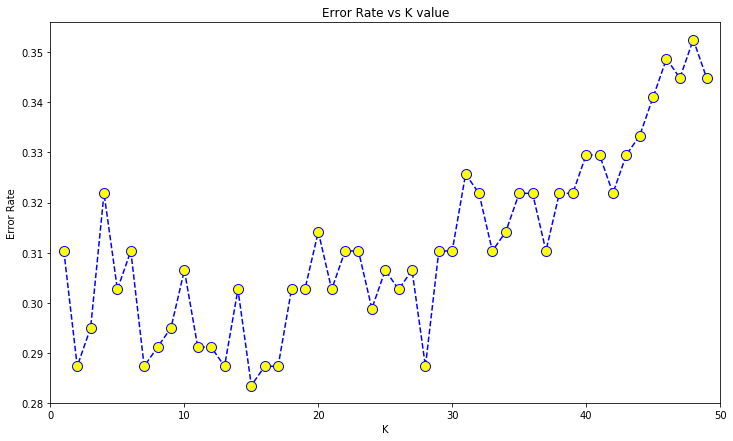

In [49]:
# now create following plot using the information from your loop
plt.figure(figsize=(12,7))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.xlim([0,50])
plt.ylabel("Error Rate")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

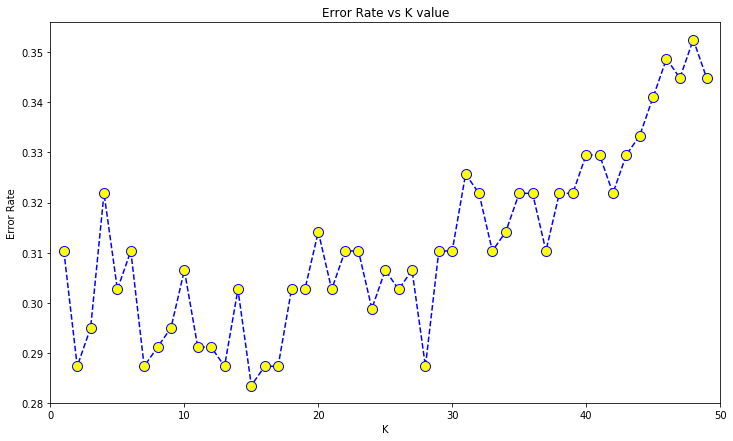

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
plt.figure(figsize=(12,7))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.xlim([0,50])
plt.ylabel("Error Rate")
knn.fit(train_x,train_y)

In [51]:
Pred_y3=knn.predict(test_x)

In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
accuracy=accuracy_score(test_y,Pred_y3)
F1=f1_score(test_y,Pred_y3)
precision=precision_score(test_y,Pred_y3)
recall=recall_score(test_y,Pred_y3)
roc_auc=roc_auc_score(test_y,Pred_y3)
confusion_matrix=confusion_matrix(test_y,Pred_y3)
print("Accuracy_Score:",accuracy)
print("F1_score:",f1_score)
print("Precision_score",precision_score)
print("Recall_score:",recall_score)
print("ROC_AUC_score:",roc_auc_score)
print("Confusion Matrix:",confusion_matrix)

Accuracy_Score: 0.6781609195402298
F1_score: <function f1_score at 0x00000260AEC75378>
Precision_score <function precision_score at 0x00000260AEC75598>
Recall_score: <function recall_score at 0x00000260AEC75620>
ROC_AUC_score: <function roc_auc_score at 0x00000260AEC698C8>
Confusion Matrix: [[138  24]
 [ 60  39]]


## IV.Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(train_x,train_y)

GaussianNB(priors=None)

In [54]:
Pred_y4=gaussian.predict(test_x)

In [55]:
accuracy=accuracy_score(test_y,Pred_y4)
F1=f1_score(test_y,Pred_y4)
precision=precision_score(test_y,Pred_y4)
recall=recall_score(test_y,Pred_y4)
roc_auc=roc_auc_score(test_y,Pred_y4)
print("Accuracy_Score:",accuracy)
print("F1_score:",f1_score)
print("Precision_score",precision_score)
print("Recall_score:",recall_score)
print("ROC_AUC_score:",roc_auc)

Accuracy_Score: 0.7739463601532567
F1_score: <function f1_score at 0x00000260AEC75378>
Precision_score <function precision_score at 0x00000260AEC75598>
Recall_score: <function recall_score at 0x00000260AEC75620>
ROC_AUC_score: 0.7727272727272727


## Random Forest Model is most accurate algorithm for this data